In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [4]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


In [6]:
df.sport.unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'f1',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [ ]:
# Section: Earning over time
# The first hypothesis to test the earning of highest-paid athletes increases as time goes on

In [7]:
# Creating a dataframe with athletes only ranked top 1
df_no1 = df[(df.current_rank == 1)]
df_no1.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,basketball,1994,30.0


In [8]:
df_no1.describe()

,s.no,current_rank,year,earnings
count,30.00000,30.0,30.000000,30.000000
mean,146.60000,1.0,2005.133333,91.396667
std,88.45751,0.0,9.216677,60.464293
min,1.00000,1.0,1990.000000,28.600000
25%,73.50000,1.0,1997.250000,62.625000
50%,147.00000,1.0,2005.500000,79.300000
75%,219.50000,1.0,2012.750000,103.750000
max,292.00000,1.0,2020.000000,300.000000


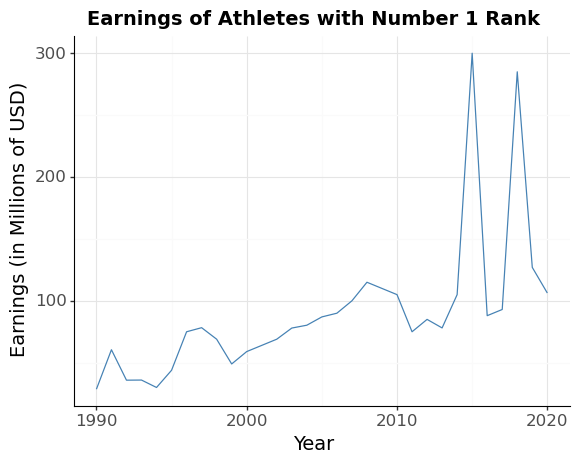

<ggplot: (8763626468413)>

In [17]:
# Creating a line graph to see the general trend
(ggplot(df_no1, aes(x='year', y='earnings'))
 + geom_line(color='steelblue')
 + labs(title='Earnings of Athletes with Number 1 Rank', x='Year', y='Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [ ]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years

In [18]:
reg1 = smf.ols('earnings~year',df_no1).fit() 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     18.84
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           0.000167
Time:                        13:40:23   Log-Likelihood:                -157.40
No. Observations:                  30   AIC:                             318.8
Df Residuals:                      28   BIC:                             321.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8251.8236   1921.946     -4.293      0.000   -1.22e+04   -4314.896
year           4.1609      0.959      4.341      0.000       2.198       6.124
==============================================================================
Omnibus:                       32.185   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.620
Skew:                           2.377   Prob(JB):                     1.70e-16
Kurtosis:                       8.958   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Regression analysis:
# The coefficient for the year variable is 4.1609, indicating that for each one-year increase in the year, 
# the earnings of the top-ranked athlete increase by an average of $4.16 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 40.2% of the dependent variable (earnings) is explained by the independent variable (year)
# the adjusted R-squared value of 0.381 suggests that there may be other factors affecting the variation in earnings beyond just the year variable.

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and earnings, 
# indicating that the earning of highest-paid athletes tends to increase as time goes on
# Thus, we should not reject the first hypothesis

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_69997/495313160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


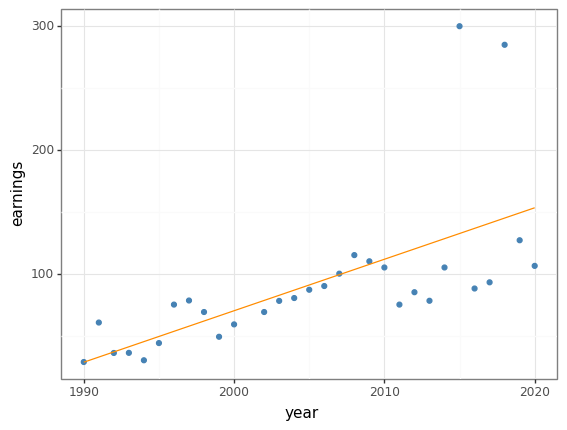

<ggplot: (8763606229628)>

In [19]:
# We can then apply the regression on predicted earning in a line on scatterplot
df_no1['reg1_pred_earning']=reg1.predict() 

(ggplot(df_no1, aes(x='year', y='earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg1_pred_earning'), color='darkorange')+ theme_bw()
)

In [ ]:
# The majority of the earning data fit well with the line
# except for two outliers that we can identify from the box plot below

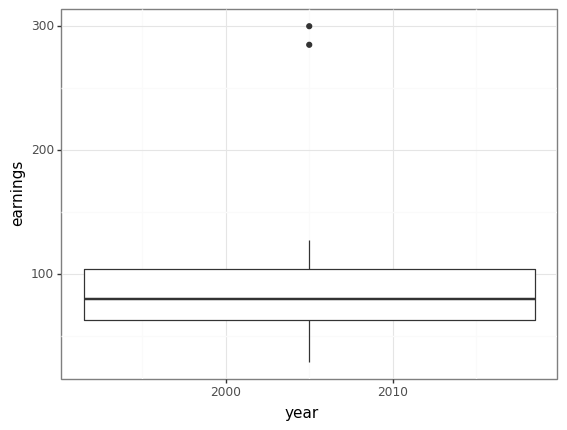

<ggplot: (8763609289232)>

In [47]:
(ggplot(df_no1, aes(x='year', y='earnings')) +
        geom_boxplot()+theme_bw()
)

In [20]:
df_no1.sort_values(by='earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

s.no                               242
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                   1
sport                           boxing
year                              2015
earnings                         300.0
reg1_pred_earning            132.45118
Name: 241, dtype: object
s.no                               272
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                >100
sport                           boxing
year                              2018
earnings                         285.0
reg1_pred_earning           144.933971
Name: 271, dtype: object


/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_69997/1710731671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# By the code above, we can see that both data are from the same boxing athelete Floyd Mayweather
# In 2015, having an earning of 300 million USD; in 2018 having an earning of 285 million USD
# Both deviates far from the predicted earning by regression 1

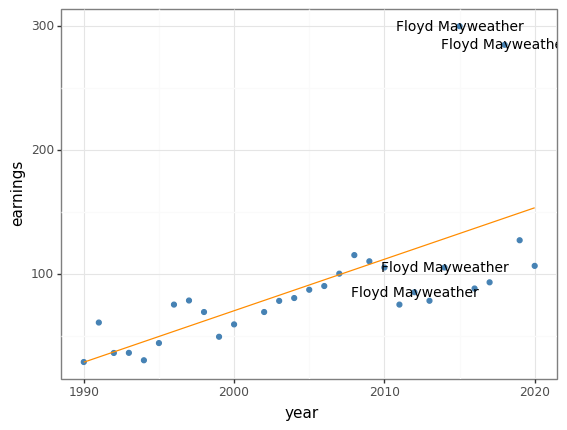

<ggplot: (8763606250981)>

In [21]:
(ggplot(df_no1, aes(x='year', y='earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg1_pred_earning'), color='darkorange')+ theme_bw()+
 geom_text(aes(x='year', y='earnings', label='name'),
         color='black', size=10,
         data=df_no1.loc[(df_no1['name']=='Floyd Mayweather')])
)

In [ ]:
# The second hypothesis is to test the average earning of top 10 ranked players increases over time

In [42]:
avg_earnings_by_year = df.groupby("year")["earnings"].mean()
df_avg_earnings = pd.DataFrame(avg_earnings_by_year).reset_index()
df_avg_earnings = df_avg_earnings.rename(columns={'earnings': 'avg_earnings'})
df_avg_earnings.head()

,year,avg_earnings
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89


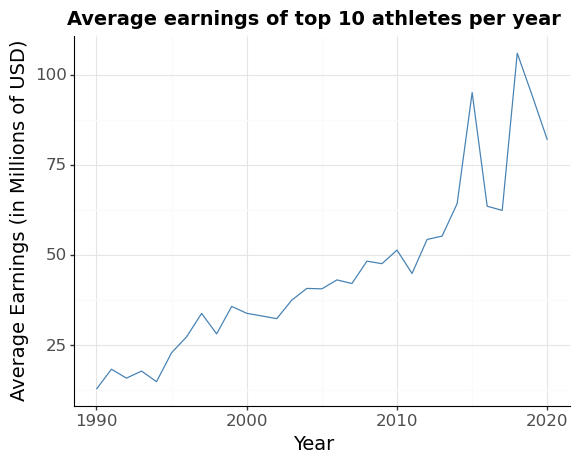

<ggplot: (8763609197858)>

In [43]:
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))
 + geom_line(color='steelblue')
 + labs(title='Average earnings of top 10 athletes per year', x='Year', y='Average Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [ ]:
# Similarily to the first hypothesis we tested, there is an overall increase trend from the line graph
# We can again focus on a regressional analysis to have a predicted earning value

In [44]:
reg2 = smf.ols('avg_earnings~year',df_avg_earnings).fit() 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_earnings   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     145.4
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.33e-12
Time:                        14:17:32   Log-Likelihood:                -110.47
No. Observations:                  30   AIC:                             224.9
Df Residuals:                      28   BIC:                             227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4802.6131    402.125    -11.943      0.000   -5626.329   -3978.898
year           2.4179      0.201     12.057      0.000       2.007       2.829
==============================================================================
Omnibus:                       14.925   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.813
Skew:                           1.420   Prob(JB):                     0.000368
Kurtosis:                       5.140   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Regression analysis:
# The coefficient for the year variable is 2.4179, indicating that for each one-year increase in the year, 
# the average earnings of the top 10 ranked athlete increase by an average of $2.4179 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 83.8% of the dependent variable (earnings) is explained by the independent variable (year)

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and average earnings of top 10 athletes, 
# indicating that the earning of highest-paid top 10 athletes tends to increase as time goes on
# Thus, we should not reject the second hypothesis

In [ ]:
# We can explore the relationship on a scatterplot with the regression line

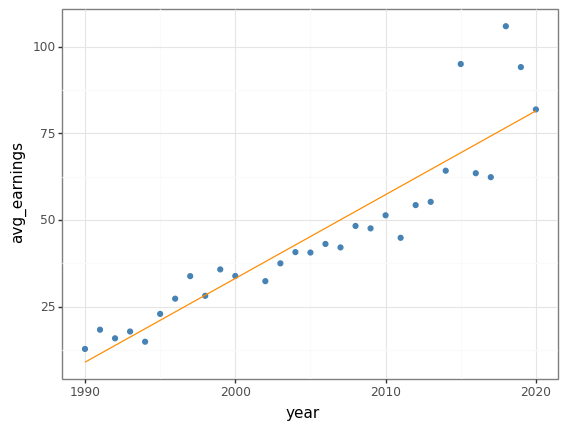

<ggplot: (8763627185354)>

In [45]:
df_avg_earnings['reg2_pred_avg_earning']=reg2.predict() 

(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg2_pred_avg_earning'), color='darkorange')+ theme_bw()
)

In [ ]:
# We can identify 3 outliers from the box plot below
# Even though there are 3 outliers instead of 2 in the first regression, 
# they are much closer to the majority of the data points

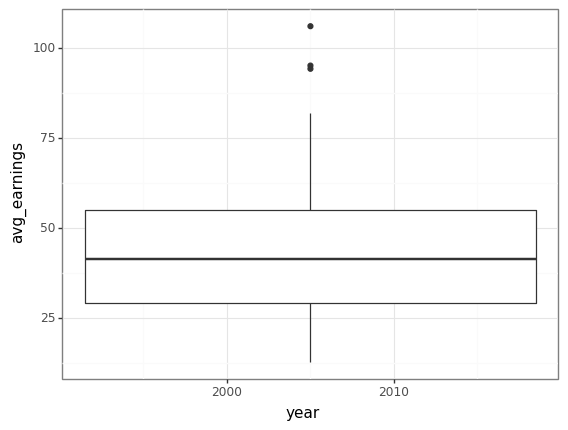

<ggplot: (8763627209644)>

In [46]:
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings')) +
        geom_boxplot()+theme_bw()
)

In [55]:
df_avg_earnings.sort_values(by='avg_earnings', inplace=True, ascending=False)
print(df_avg_earnings.iloc[0])
print(df_avg_earnings.iloc[1])
print(df_avg_earnings.iloc[2])

year                     2018.000000
avg_earnings              105.940000
reg2_pred_avg_earning      76.670187
Name: 27, dtype: float64
year                     2015.000000
avg_earnings               95.030000
reg2_pred_avg_earning      69.416545
Name: 24, dtype: float64
year                     2019.000000
avg_earnings               94.140000
reg2_pred_avg_earning      79.088067
Name: 28, dtype: float64


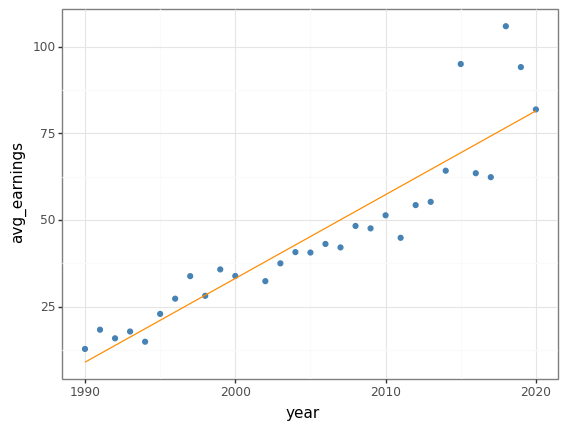

<ggplot: (8763609320988)>

In [53]:
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg2_pred_avg_earning'), color='darkorange')+ theme_bw()+
 geom_text(aes(x='year', y='avg_earnings', label='year'),
         color='black', size=10,
         data=df_avg_earnings.loc[(df_avg_earnings['year']==2018)
                                 & (df_avg_earnings['year']==2015)
                                  &(df_avg_earnings['year']==2019)
                                 ])
) #not properly labelled yet!!!!

In [ ]:
# Comparing to the first regression/hypothesis:
# The coefficient on year is lower in the second regression than in the first,
# suggesting the average earnings of top 10 players increase less than the top-1 ranked player over time.

# The R-squared is significantly higher in the second hypothesis,
# indicating a stronger positive correlation between year and average earnings.

In [ ]:
# The third hypothesis is to test 

In [ ]:
#--------------------------------------------------------------------------------#

In [24]:
df_no1['nationality'].unique()

array(['USA', 'Argentina', 'Switzerland', 'Portugal', 'Germany'],
      dtype=object)

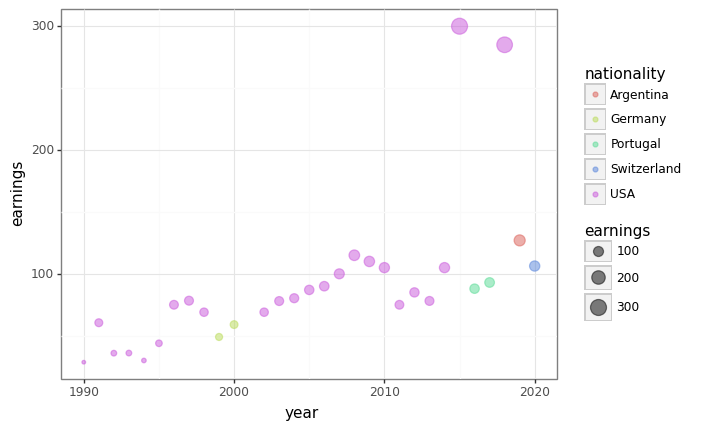

<ggplot: (8781077460206)>

In [25]:
(ggplot(df_no1, mapping=aes(x='year', y='earnings',color='nationality',size='earnings'))+
geom_point(alpha = 0.5)+
theme_bw()
)

In [ ]:
# From this visualization, we can see that the majority of No.1 ranked athletes from 1990 to 2020 are from USA. 
# According to the dataset, No.1 players are only from 5 countries, as indicated above. 

In [ ]:
# In this section, we will perform some data analysis on specific sport in comparison to the dataset

In [41]:
df_basketball = df[df["sport"] == "basketball"]
df_basketball.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
12,13,Michael Jordan,USA,3,8,basketball,1991,16.0
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
35,36,Shaquille O'Neal,USA,6,>40,basketball,1993,15.2


In [42]:
df_basketball.describe()

,s.no,current_rank,year,earnings
count,82.000000,82.000000,82.000000,82.000000
mean,157.975610,5.573171,2005.853659,41.869512
std,80.728164,2.624813,8.341658,20.200071
min,8.000000,1.000000,1990.000000,8.100000
25%,97.750000,3.250000,1999.000000,26.025000
50%,148.000000,6.000000,2005.000000,36.000000
75%,224.750000,7.750000,2013.000000,53.000000
max,298.000000,10.000000,2020.000000,89.000000


In [43]:
df_basketball['name'].unique()

array(['Michael Jordan', "Shaquille O'Neal", "Shaq O'Neal",
       'Dennis Rodman', 'Patrick Ewing', 'Grant Hill', 'Kevin Garnett',
       'Kobe Bryant', 'LeBron James', 'Kevin Durant', 'Stephen Curry',
       'James Harden'], dtype=object)

In [50]:
basketball_earnings = df_basketball.groupby("name")["earnings"].sum().reset_index()
print(basketball_earnings)

                name  earnings
0      Dennis Rodman      12.9
1         Grant Hill     137.1
2       James Harden      46.6
3       Kevin Durant     300.3
4      Kevin Garnett     101.7
5        Kobe Bryant     601.1
6       LeBron James     844.8
7     Michael Jordan     738.8
8      Patrick Ewing      31.2
9        Shaq O'Neal     102.2
10  Shaquille O'Neal     238.2
11     Stephen Curry     278.4


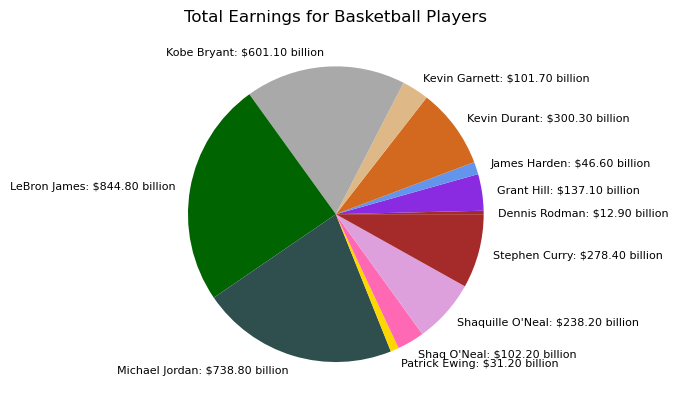

In [61]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

labels = [f"{name}: ${earnings:.2f} billion" 
          for name, earnings in zip(basketball_earnings["name"], 
                                    basketball_earnings["earnings"])]
plt.pie(basketball_earnings["earnings"], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings for Basketball Players")
plt.show()